In [140]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [141]:
data = fetch_california_housing(as_frame=True)

In [142]:
df = pd.DataFrame(data.frame)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [144]:
numerical_df = df.select_dtypes(include=[np.number]).columns

In [145]:
numerical_df

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

plot histogram

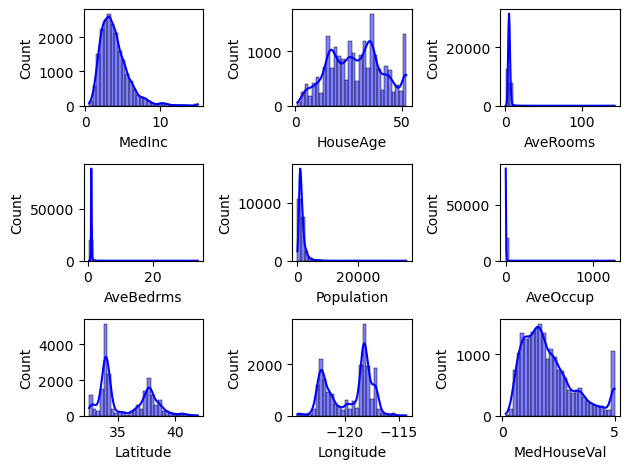

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
for i , feature in enumerate(numerical_df):
    plt.subplot(3,3,i+1)
    sns.histplot(df[feature],bins=30, kde=True , color='blue')
plt.tight_layout()
plt.show()

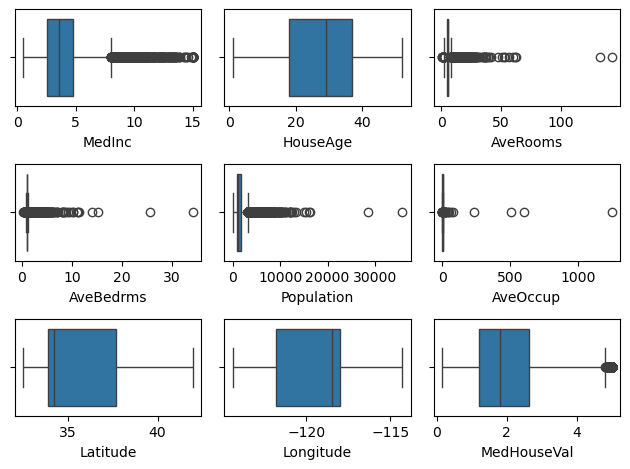

In [148]:
for i , feature in enumerate(numerical_df):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[feature])
plt.tight_layout()
plt.show()

In [149]:
otliers_summary={}

In [150]:
for feature in (numerical_df):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    l = Q1-(1.5*IQR)
    u = Q3+(1.5*IQR)
    outliers= df[(df[feature] < l) | (df[feature] > u )]
    otliers_summary[feature] = len(outliers)

In [151]:
otliers_summary

{'MedInc': 681,
 'HouseAge': 0,
 'AveRooms': 511,
 'AveBedrms': 1424,
 'Population': 1196,
 'AveOccup': 711,
 'Latitude': 0,
 'Longitude': 0,
 'MedHouseVal': 1071}